In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
#import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [5]:
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "labels"
]

df = pd.read_csv('../project/nsl-kdd/KDDTrain+.txt', names=col_names, index_col=False)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.loc[df.labels != 'normal', 'labels'] = 'attack'
df['labels'].value_counts()

normal    67343
attack    58630
Name: labels, dtype: int64

In [9]:
print(f"Dataset shape:{df.shape}")

Dataset shape:(125973, 42)


In [10]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
print(f"The number of duplicated records: {df.duplicated().sum()}")

The number of duplicated records: 9


In [12]:
df.drop_duplicates(inplace=True)

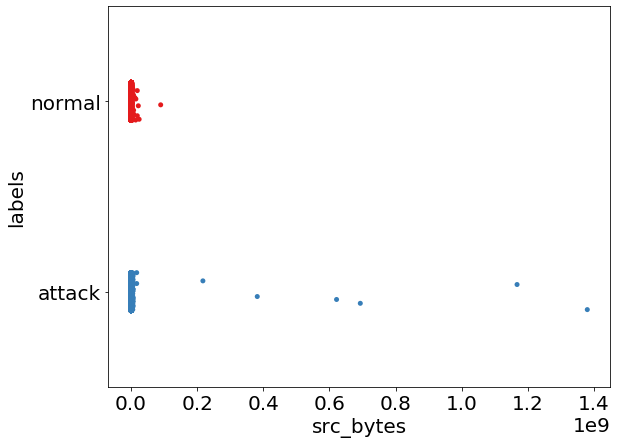

In [13]:
plt.figure(figsize = (9,7))
sns.stripplot(data=df, y='labels' , x='src_bytes',palette='Set1', alpha = 1)
plt.show()

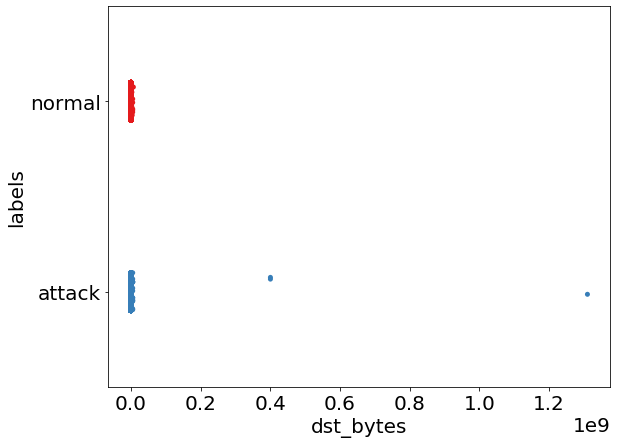

In [12]:
plt.figure(figsize = (9,7))
sns.stripplot(data=df, y='labels' , x='dst_bytes',palette='Set1', alpha = 1)
plt.show()

In [14]:
X = df.drop('labels',axis=1)
Y = df['labels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [15]:
print(f"Train-set shape:{X_train.shape}")
print(f"Test-set shape:{X_test.shape}")

Train-set shape:(94473, 41)
Test-set shape:(31491, 41)


In [16]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
55807,0,tcp,http,SF,265,6886,0,0,0,0,...,22,255,1.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00
124052,0,tcp,private,S0,0,0,0,0,0,0,...,255,8,0.03,0.08,0.00,0.00,1.00,1.00,0.00,0.00
83745,0,tcp,private,S0,0,0,0,0,0,0,...,255,7,0.03,0.07,0.00,0.00,1.00,1.00,0.00,0.00
59070,0,tcp,smtp,SF,1133,330,0,0,0,0,...,231,165,0.71,0.02,0.00,0.00,0.00,0.00,0.00,0.00
20457,0,tcp,http,SF,308,1380,0,0,0,0,...,173,149,0.86,0.02,0.01,0.00,0.01,0.01,0.01,0.01


In [17]:
std_scaler = preprocessing.StandardScaler()
def standardization(df, col):
    for i in col:
        arr = np.array(df[i])
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [18]:
numeric_col = X_train.select_dtypes(include='number').columns
X_train = standardization(X_train, numeric_col)
X_test = standardization(X_test, numeric_col)
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
55807,-0.108863,tcp,http,SF,-0.007425,-0.003997,-0.012602,-0.090112,-0.007102,-0.09459,...,-1.614178,1.259651,1.066487,-0.439665,-0.318818,0.156692,-0.639500,-0.624995,-0.387764,-0.376276
124052,-0.108863,tcp,private,S0,-0.007473,-0.005480,-0.012602,-0.090112,-0.007102,-0.09459,...,0.734092,-0.971677,-1.093711,-0.015509,-0.480453,-0.289735,1.608438,1.618448,-0.387764,-0.376276
83745,-0.108863,tcp,private,S0,-0.007473,-0.005480,-0.012602,-0.090112,-0.007102,-0.09459,...,0.734092,-0.980711,-1.093711,-0.068528,-0.480453,-0.289735,1.608438,1.618448,-0.387764,-0.376276
59070,-0.108863,tcp,smtp,SF,-0.007266,-0.005409,-0.012602,-0.090112,-0.007102,-0.09459,...,0.492210,0.446617,0.420655,-0.333626,-0.480453,-0.289735,-0.639500,-0.624995,-0.387764,-0.376276
20457,-0.108863,tcp,http,SF,-0.007417,-0.005183,-0.012602,-0.090112,-0.007102,-0.09459,...,-0.092338,0.302077,0.754706,-0.333626,-0.448126,-0.289735,-0.617021,-0.602560,-0.355159,-0.344970


In [19]:
cat_col = X_train.select_dtypes('object').columns
# encoding train set
categorical_train = X_train[cat_col]
categorical_train = pd.get_dummies(categorical_train,columns=cat_col)
categorical_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
55807,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
124052,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83745,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
59070,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20457,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
X_train.drop(cat_col, axis=1, inplace=True)
X_train = pd.concat([X_train, categorical_train],axis=1)
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
55807,-0.108863,-0.007425,-0.003997,-0.012602,-0.090112,-0.007102,-0.09459,-0.028086,1.239568,-0.017576,...,0,0,0,0,0,0,0,0,1,0
124052,-0.108863,-0.007473,-0.005480,-0.012602,-0.090112,-0.007102,-0.09459,-0.028086,-0.806733,-0.017576,...,0,0,0,0,1,0,0,0,0,0
83745,-0.108863,-0.007473,-0.005480,-0.012602,-0.090112,-0.007102,-0.09459,-0.028086,-0.806733,-0.017576,...,0,0,0,0,1,0,0,0,0,0
59070,-0.108863,-0.007266,-0.005409,-0.012602,-0.090112,-0.007102,-0.09459,-0.028086,1.239568,-0.017576,...,0,0,0,0,0,0,0,0,1,0
20457,-0.108863,-0.007417,-0.005183,-0.012602,-0.090112,-0.007102,-0.09459,-0.028086,1.239568,-0.017576,...,0,0,0,0,0,0,0,0,1,0


In [21]:
cat_col = X_test.select_dtypes('object').columns
# encoding test set
categorical_test = X_test[cat_col]
categorical_test = pd.get_dummies(categorical_test,columns=cat_col)

In [22]:
fill_list = np.setdiff1d(categorical_train.columns, categorical_test.columns)
for item in fill_list:
    categorical_test[item]=0
categorical_test = categorical_test[categorical_train.columns]

In [23]:
X_test.drop(cat_col, axis=1, inplace=True)
X_test = pd.concat([X_test, categorical_test],axis=1)
X_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
21034,-0.114334,-0.008567,-0.012324,-0.017823,-0.087608,-0.009392,-0.096607,-0.025314,1.223886,-0.012287,...,0,0,0,0,0,0,0,0,1,0
77357,-0.114334,-0.008600,-0.048003,-0.017823,-0.087608,-0.009392,-0.096607,-0.025314,-0.817069,-0.012287,...,0,0,0,0,1,0,0,0,0,0
51831,-0.114334,-0.008568,-0.043212,-0.017823,-0.087608,-0.009392,-0.096607,-0.025314,1.223886,-0.012287,...,0,0,0,0,0,0,0,0,1,0
64180,-0.114334,-0.008593,-0.046711,-0.017823,-0.087608,-0.009392,-0.096607,-0.025314,-0.817069,-0.012287,...,0,0,0,0,0,0,0,0,1,0
23741,-0.114334,-0.008600,-0.048003,-0.017823,-0.087608,-0.009392,-0.096607,-0.025314,-0.817069,-0.012287,...,1,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99, random_state=40).fit(X_train)
print(f"The data has been reduced from {X_train.shape[1]} features to -> {len(pca.components_)} features")

The data has been reduced from 122 features to -> 37 features


In [25]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
model = DecisionTreeClassifier()
rfe = RFECV(model, n_jobs=-1)
rfe.fit(X_train, Y_train)

RFECV(cv=None,
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring=None, step=1, verbose=0)

In [28]:
new_features_count = len(rfe.estimator_.feature_importances_)
print(f"The number of features has been reduced from {X_train.shape[1]} to -> {new_features_count}")

The number of features has been reduced from 37 to -> 24


In [29]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

In [30]:
# Fitting a model and saving the results
results = pd.DataFrame(columns=['Kernel Name','Train-set Score','Test-set Score','Recall','Precision','f1-score'])
    
def fit_model_result(x_train, y_train, x_test, y_test, kernel_name, model):
    # Modelling
    reg = model
    reg.fit(x_train,y_train)
    
    # Getting evaluation results
    y_pred = reg.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=5, output_dict=True)
    recall = round(report['weighted avg']['recall']*100, 2)
    precision = round(report['weighted avg']['precision']*100, 2)
    f1 = round(report['weighted avg']['f1-score']*100,2)
    test_score = round(report['accuracy']*100,2)
    train_score = round(reg.score(x_train,y_train)*100,2)
    
    # Printing results
    results.loc[len(results.index)] = [kernel_name, train_score, test_score, recall, precision, f1]
    print(results.iloc[-1,:3])
    print(metrics.classification_report(y_test, y_pred, digits=5))
    
    # Displaying confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    metrics.plot_confusion_matrix(reg, x_test, y_test, cmap='Greens', normalize='true',ax=ax)
    plt.show()
    
    # Displaying ROC matrix
    #fig, ax = plt.subplots(figsize=(10, 8))
    #svc_disp = metrics.RocCurveDisplay.from_estimator(reg, x_test, y_test,ax=ax)
    #plt.show()

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.svm import SVC

param_grid = { 'C':loguniform(1,200),
             'gamma': loguniform(0.001,1)}
  
grid = RandomizedSearchCV(SVC(kernel = 'rbf'), param_grid,n_iter=10, n_jobs=-1, random_state=42)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f611bfbdf98>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f611bfbdc88>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [32]:
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print(f"Best C value found from Random search: {best_C}")
print(f"Best gamma value found from Random search: {best_gamma}")

Best C value found from Random search: 24.164826029897508
Best gamma value found from Random search: 0.13311216080736882


Kernel Name          RBF
Train-set Score    99.27
Test-set Score     99.23
Name: 0, dtype: object
              precision    recall  f1-score   support

      attack    0.99217   0.99121   0.99169     14569
      normal    0.99244   0.99326   0.99285     16922

    accuracy                        0.99232     31491
   macro avg    0.99230   0.99224   0.99227     31491
weighted avg    0.99232   0.99232   0.99232     31491



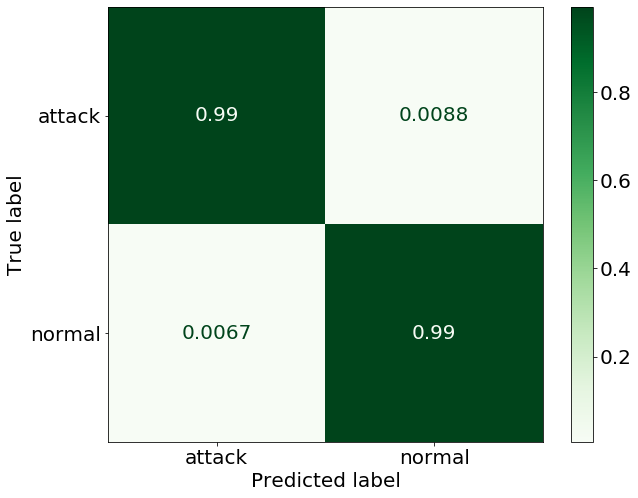

In [33]:
from sklearn.svm import SVC
fit_model_result(X_train, Y_train, X_test, Y_test, 'RBF',SVC(kernel='rbf'))

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.svm import LinearSVC

param_grid = { 'C':loguniform(0.01, 200)}
  
grid = RandomizedSearchCV(LinearSVC(), param_grid,n_iter=10, n_jobs=-1, random_state=42)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60c367d0b8>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.svm import LinearSVC

param_grid = { 'C':loguniform(0.01, 200)}
  
grid = RandomizedSearchCV(LinearSVC(), param_grid,n_iter=10, n_jobs=-1, random_state=42)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60c61af6d8>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [36]:
best_C = grid.best_estimator_.C
print(f"Best C value found from Random search: {best_C}")

Best C value found from Random search: 0.4082331665966554


Kernel Name        Linear
Train-set Score     96.85
Test-set Score      96.62
Name: 1, dtype: object
              precision    recall  f1-score   support

      attack    0.97237   0.95408   0.96314     14569
      normal    0.96110   0.97666   0.96881     16922

    accuracy                        0.96621     31491
   macro avg    0.96673   0.96537   0.96598     31491
weighted avg    0.96631   0.96621   0.96619     31491



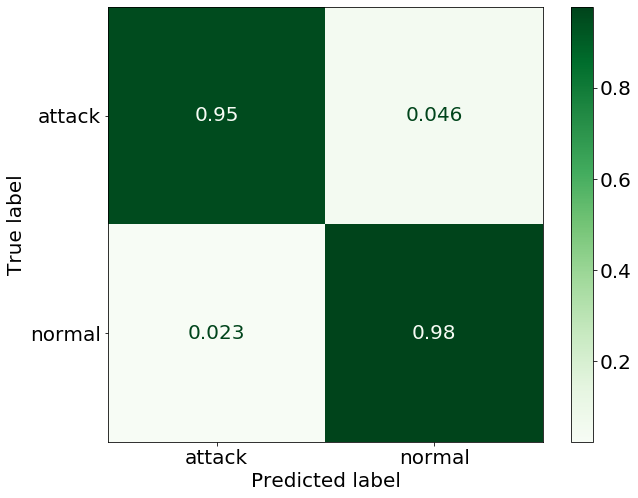

In [37]:
fit_model_result(X_train, Y_train, X_test, Y_test, 'Linear', LinearSVC(C=best_C))

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.svm import SVC

param_grid = { 'C':loguniform(0.01, 200),
             'degree' : [1,2,3,4,5]}
  
grid = RandomizedSearchCV(SVC(kernel='poly'), param_grid,n_iter=10, n_jobs=-1, random_state=42)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='poly', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60c36737f0>,
                                        'degree': [1, 2, 3, 4, 5]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [42]:
best_C = grid.best_estimator_.C
best_degree = grid.best_estimator_.degree
print(f"Best C value found from Random search: {best_C}")
print(f"Best degree value found from Random search: {best_degree}")

Best C value found from Random search: 3.8495830758681167
Best degree value found from Random search: 3


Kernel Name         Poly
Train-set Score    99.44
Test-set Score     99.36
Name: 2, dtype: object
              precision    recall  f1-score   support

      attack    0.99368   0.99252   0.99310     14569
      normal    0.99357   0.99456   0.99406     16922

    accuracy                        0.99362     31491
   macro avg    0.99362   0.99354   0.99358     31491
weighted avg    0.99362   0.99362   0.99362     31491



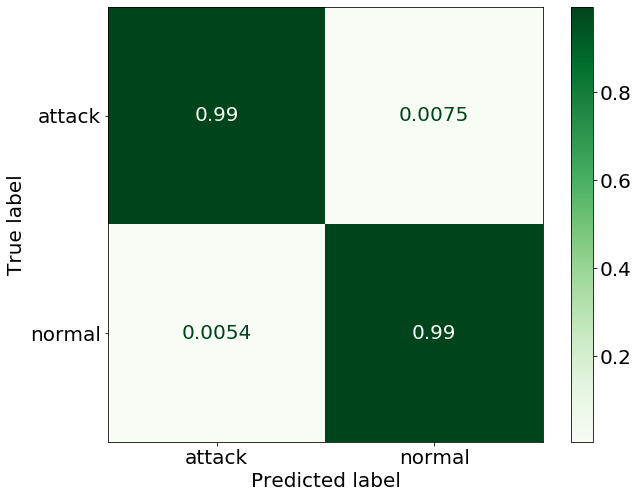

In [43]:
fit_model_result(X_train, Y_train, X_test, Y_test, 'Poly',SVC(kernel='poly', C=best_C, degree=best_degree))

In [44]:
results.groupby('Kernel Name').first()

,Train-set Score,Test-set Score,Recall,Precision,f1-score
Kernel Name,,,,,
Linear,96.85,96.62,96.62,96.63,96.62
Poly,99.44,99.36,99.36,99.36,99.36
RBF,99.27,99.23,99.23,99.23,99.23
